<a href="https://colab.research.google.com/github/Srinijohn/Srinijohn/blob/main/fruit_train1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Feb 19 04:03:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

CLI

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QxIlTfCKtN9J24fUxd70")
project = rf.workspace("sathish-p-mdirq").project("fruit-nb1tl")
dataset = project.version(1).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=f2457fdc4180d87ad2d5c570474d5a795bc88924d774abeed837f34b200941e0
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to fruit-1 in yolov8:: 100%|██████████| 438/438 [00:00<00:00, 1541.58it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=60 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:01<00:00, 14.4MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/fruit-1/data.yaml, epochs=60, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1676779514.f0a1648d4ab3.1356.0  train_batch500.jpg
F1_curve.png					    train_batch501.jpg
P_curve.png					    train_batch502.jpg
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    val_batch1_labels.jpg
results.png					    val_batch1_pred.jpg
train_batch0.jpg				    weights


/content


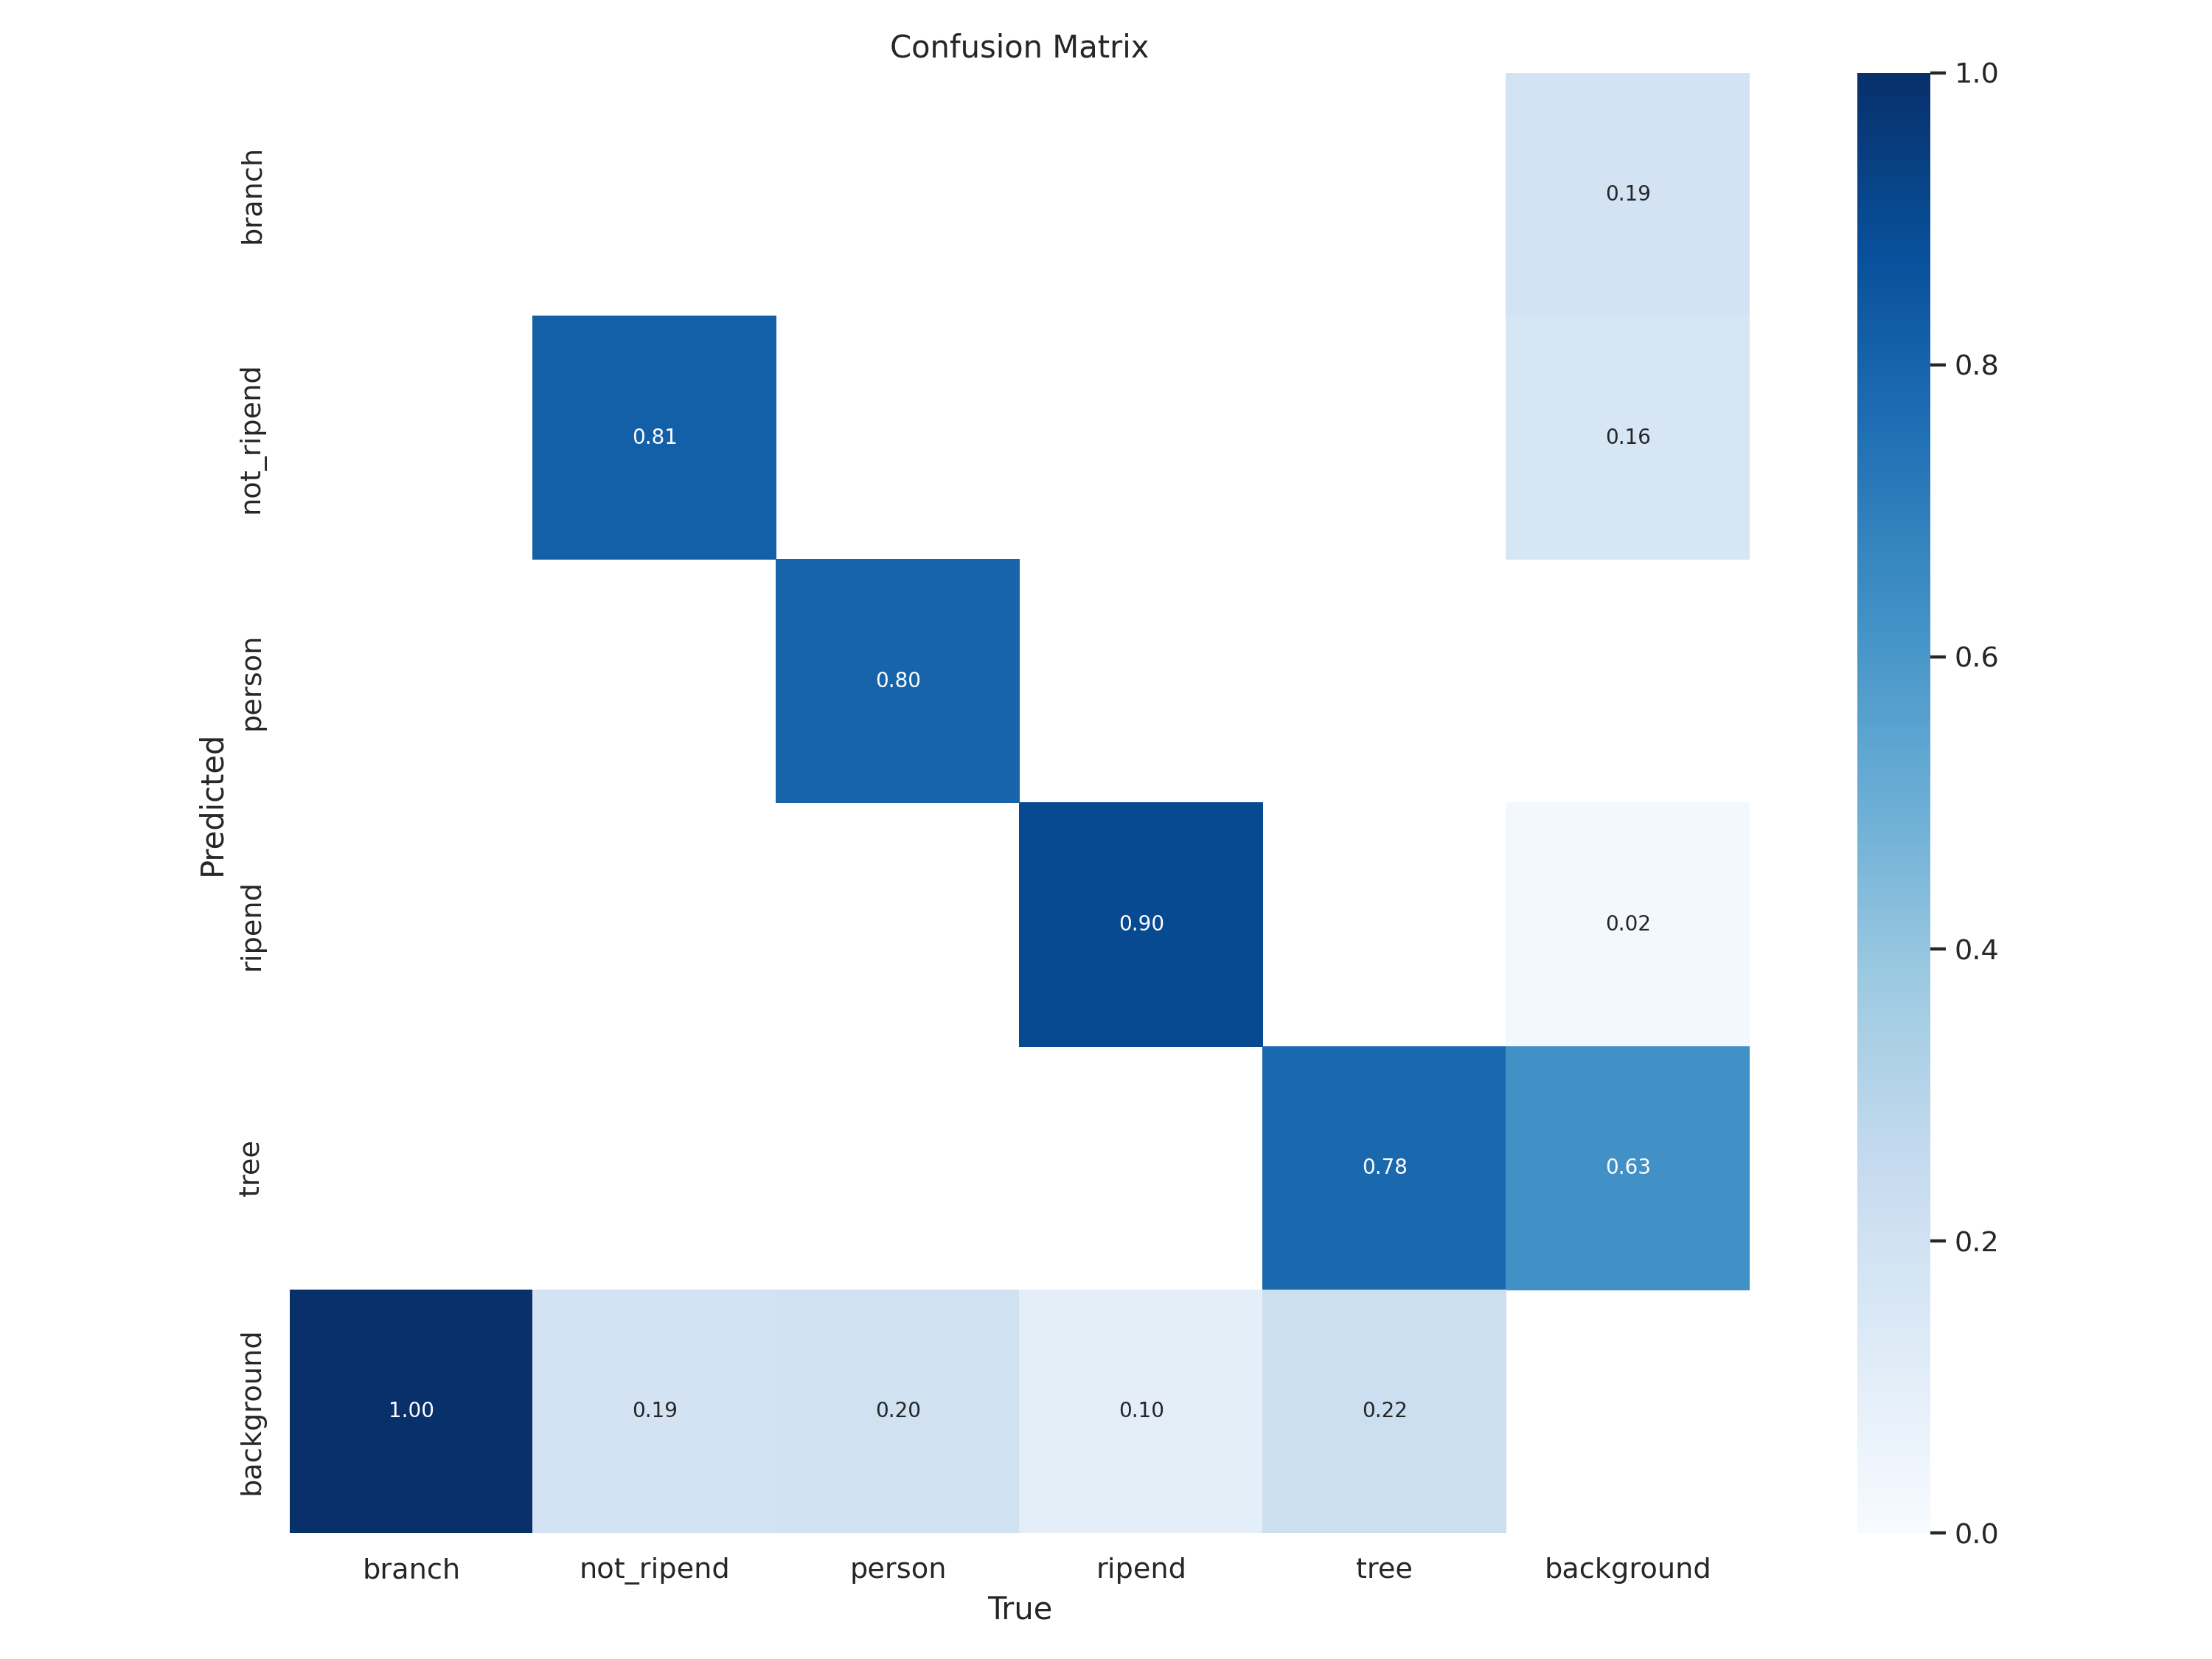

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/content


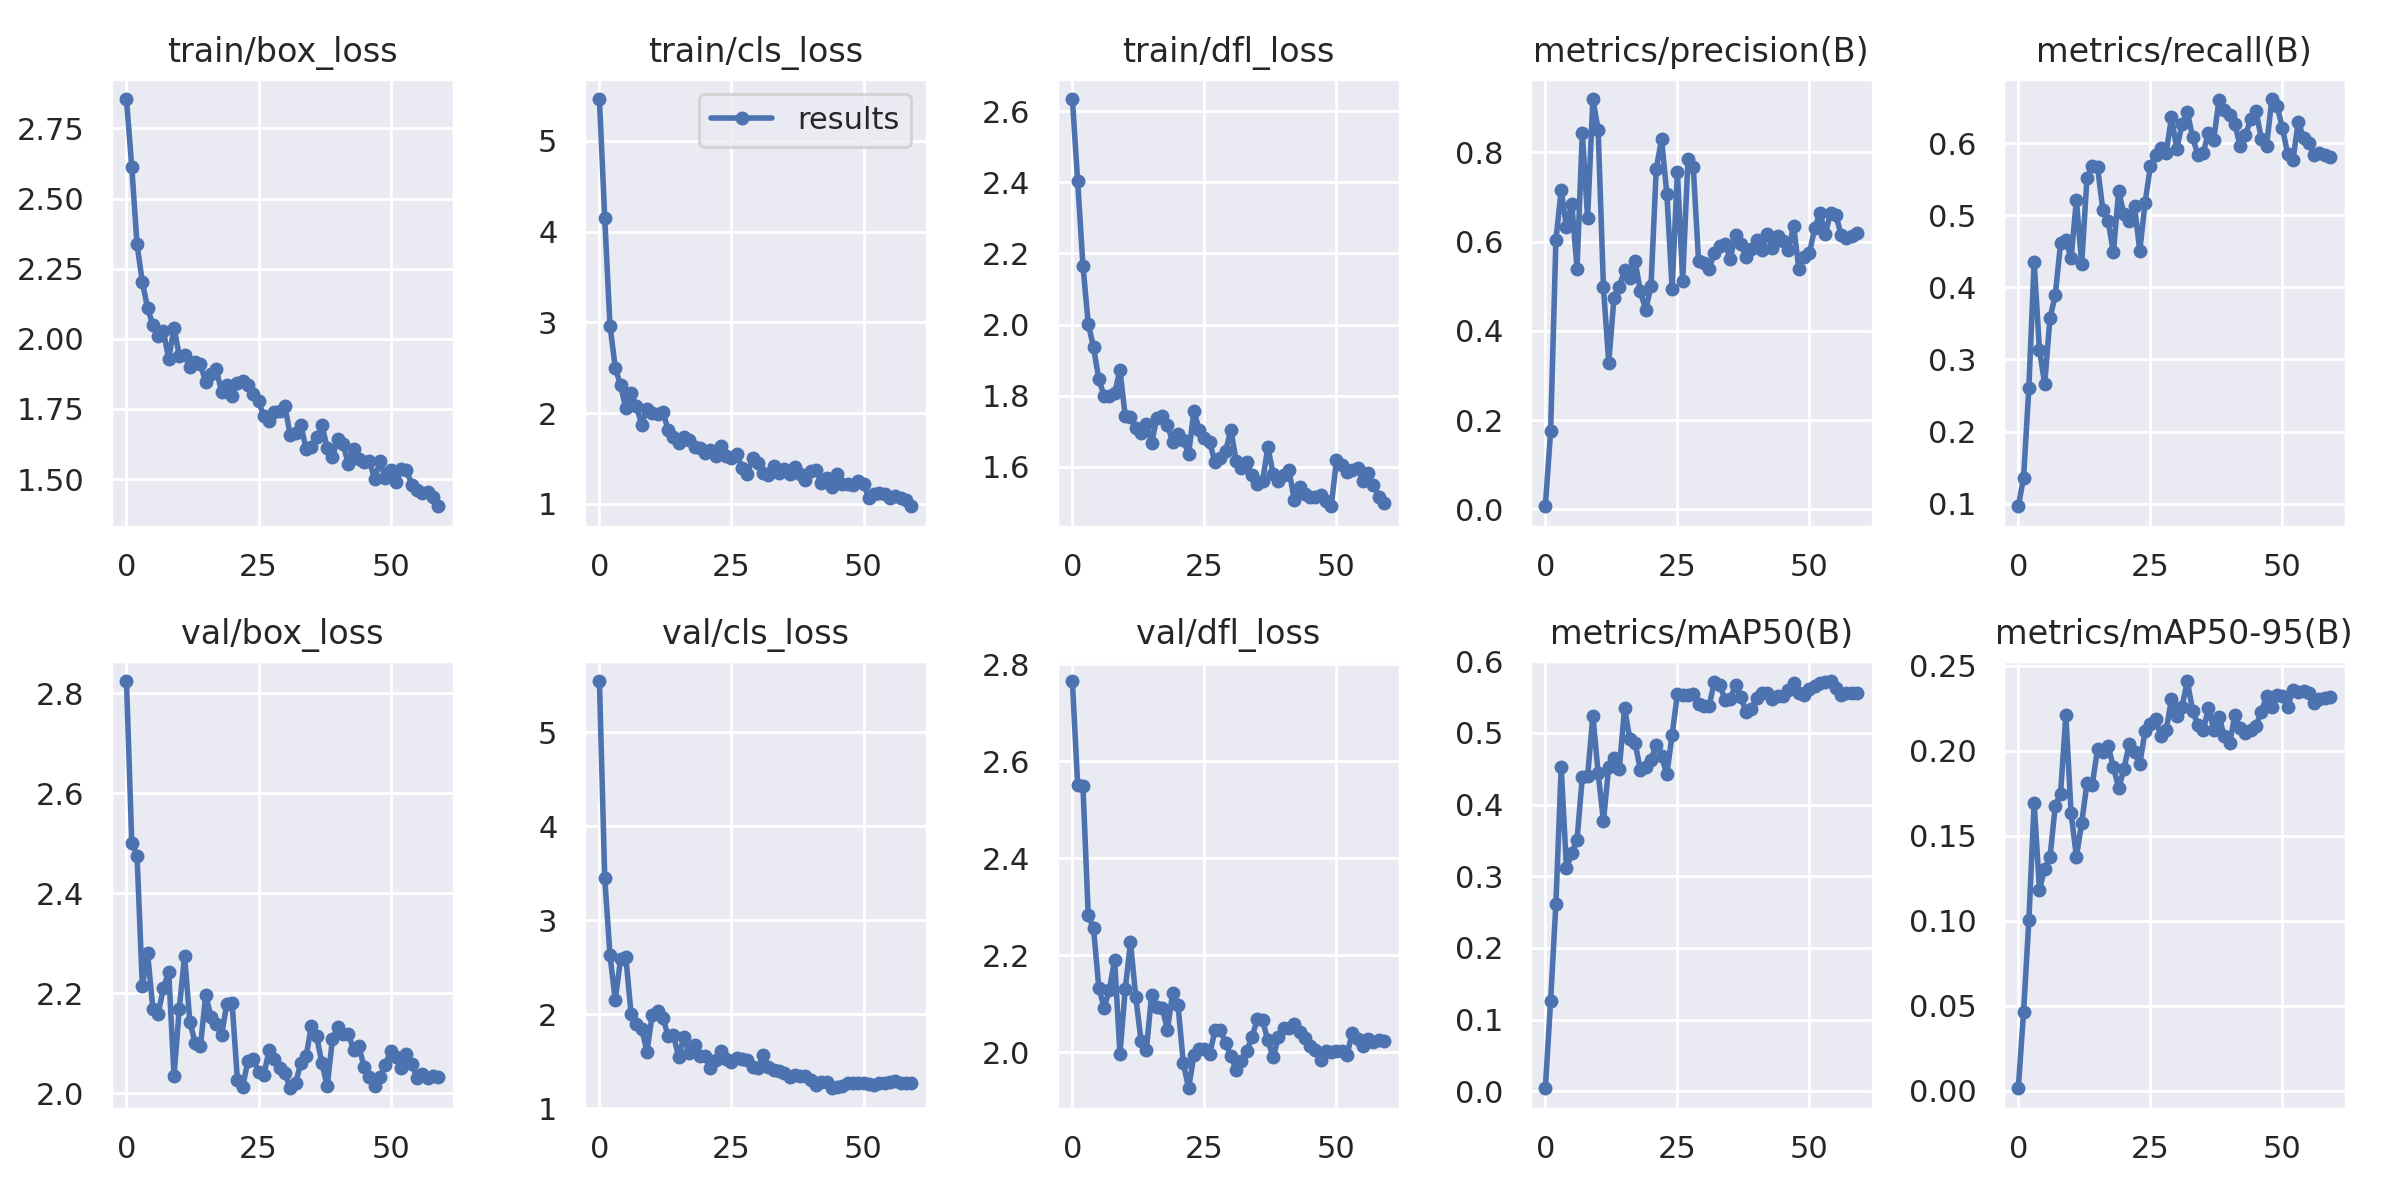

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


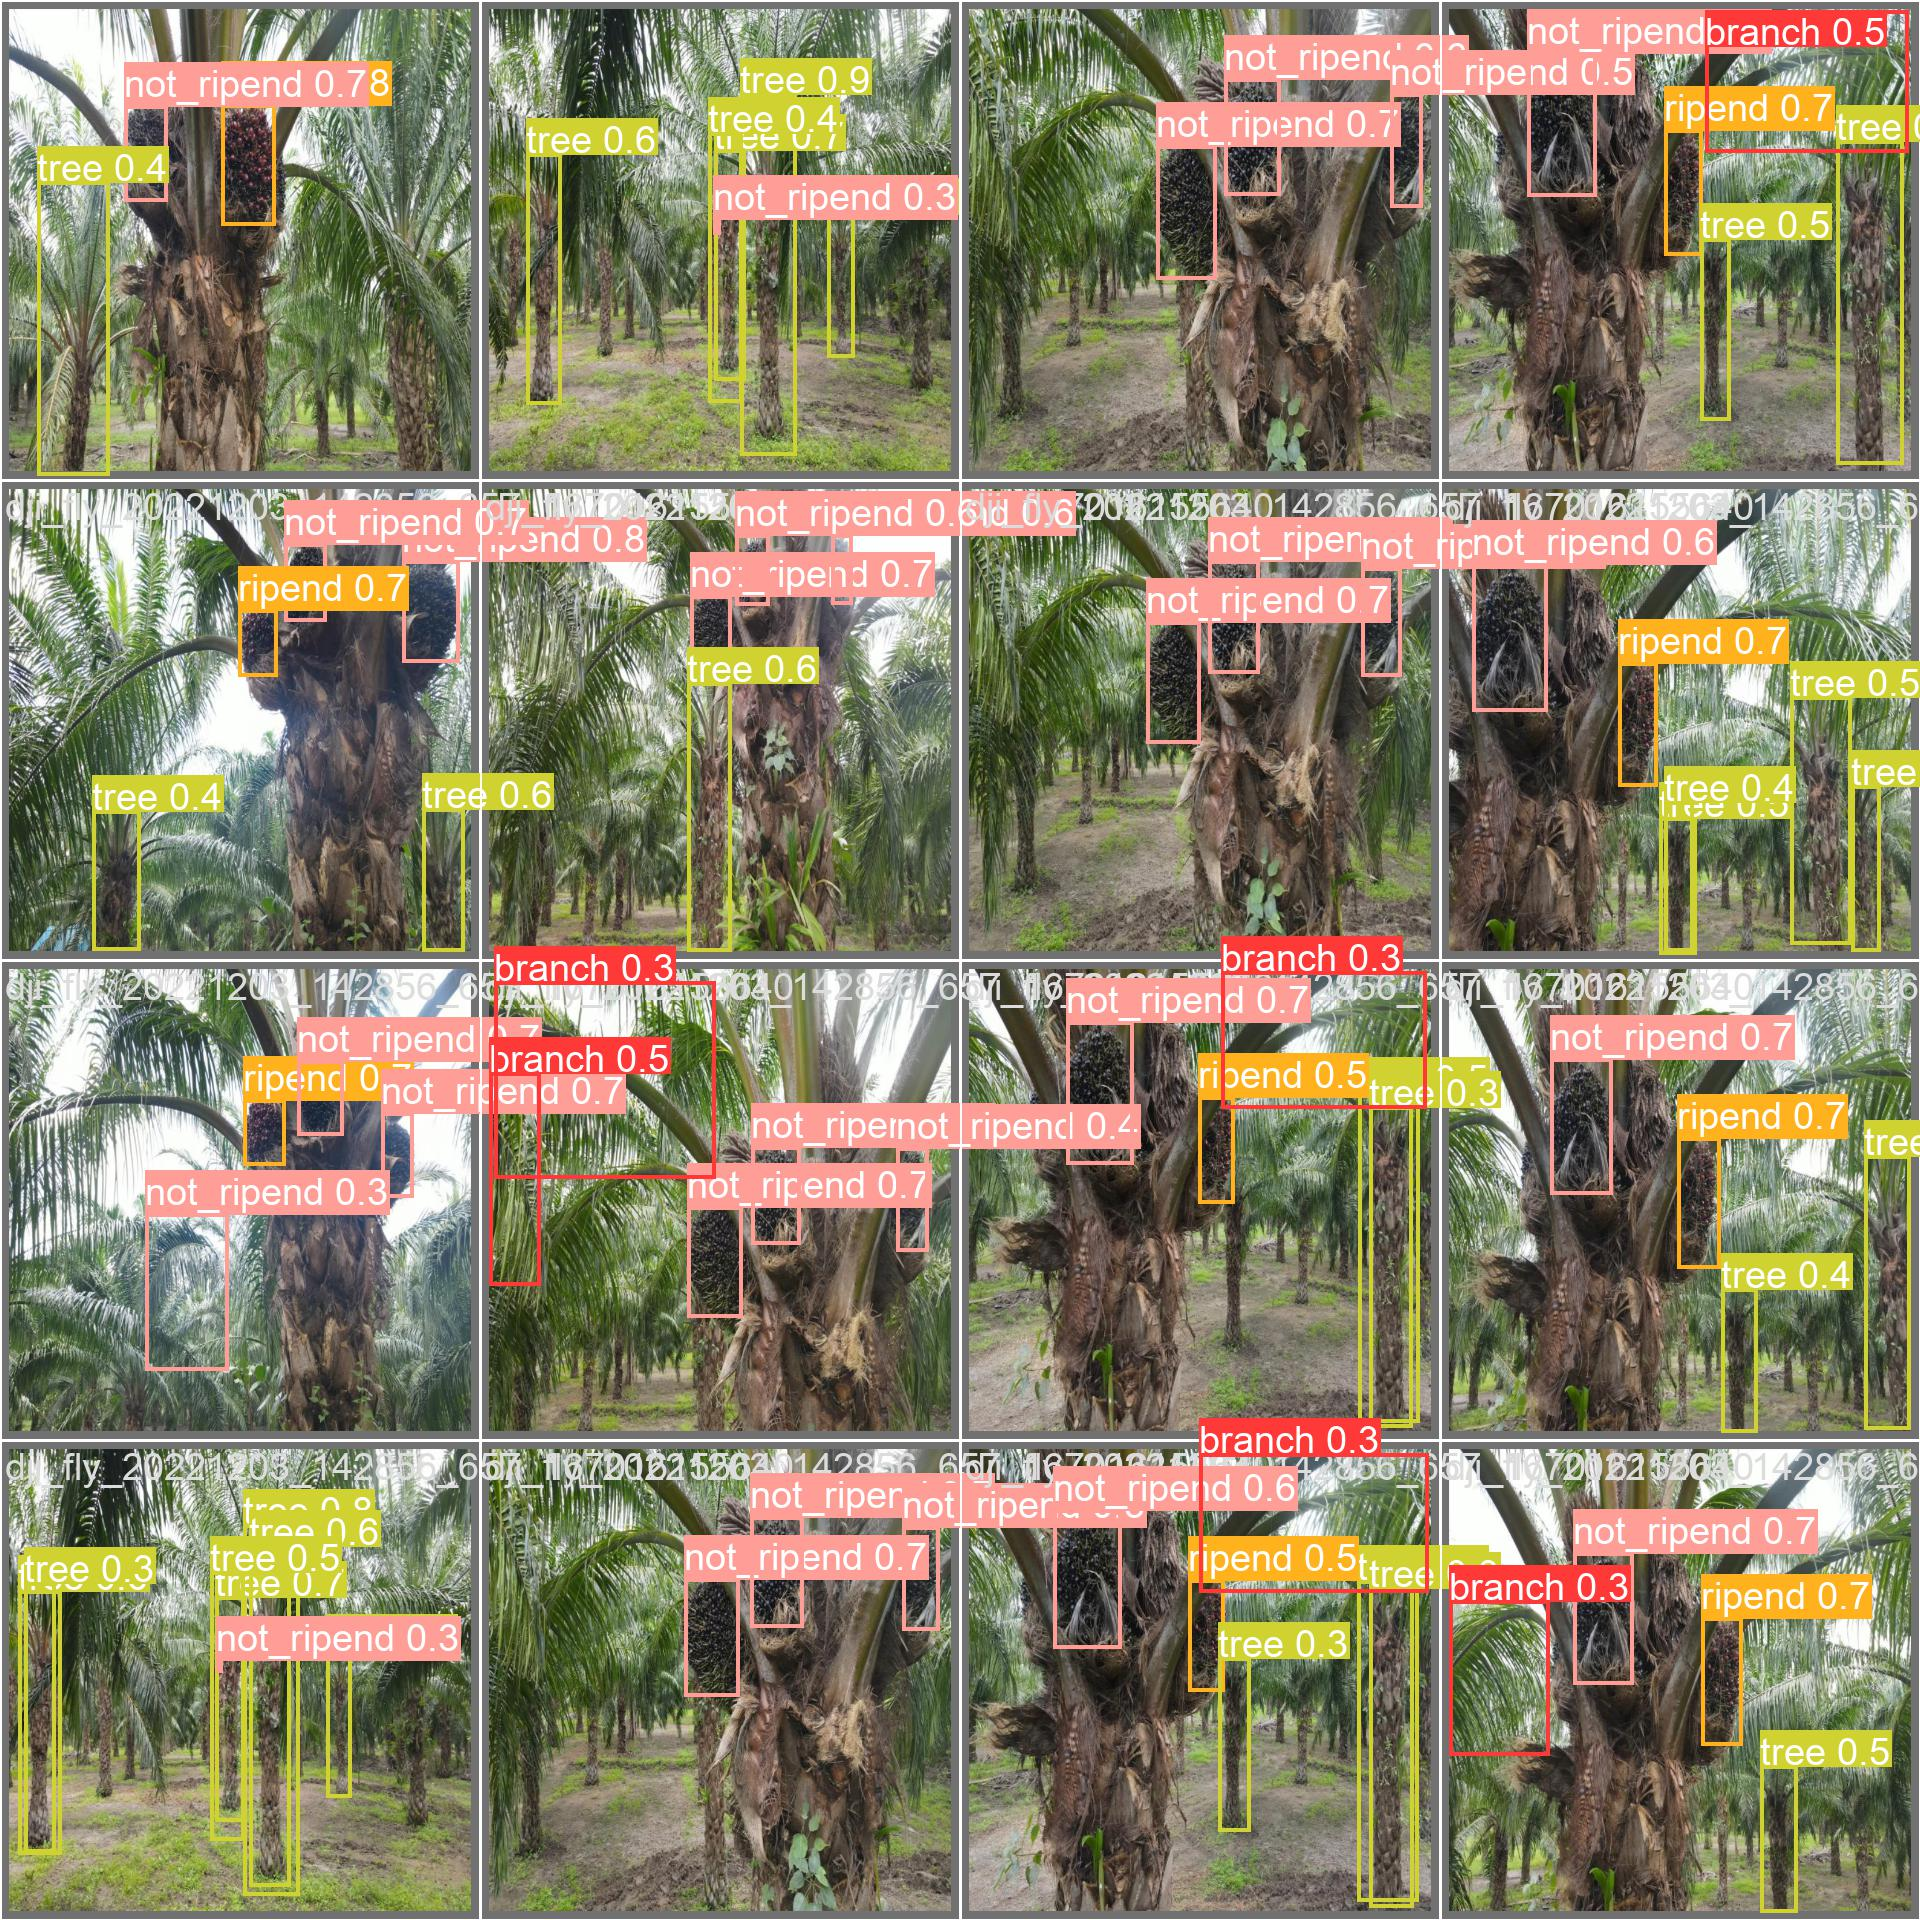

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/fruit-1/valid/labels.cache... 42 images, 0 backgrounds, 0 corrupt: 100% 42/42 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 25, len(boxes) = 137. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.08it/s]
                   all         42        137      0.596      0.624      0.571      0.242
                branch         42         11          0          0     0.0347     0.0155
            not_ripend         42         59      0.758      0.795      0.698      0.295
                person         42 

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/23 /content/datasets/fruit-1/test/images/dji_fly_20221203_142856_657_1670161556406_video_mp4-102_jpg.rf.2cd79a42febef9d007672bd1dcf3d720.jpg: 800x800 1 not_ripend, 1 ripend, 1 tree, 26.1ms
image 2/23 /content/datasets/fruit-1/test/images/dji_fly_20221203_142856_657_1670161556406_video_mp4-104_jpg.rf.276387f53127e4ad65cc92bffff5ac90.jpg: 800x800 1 not_ripend, 1 ripend, 1 tree, 26.1ms
image 3/23 /content/datasets/fruit-1/test/images/dji_fly_20221203_142856_657_1670161556406_video_mp4-126_jpg.rf.837d22d2ba9614adad94aa0f6bd576d1.jpg: 800x800 1 not_ripend, 1 ripend, 25.6ms
image 4/23 /content/datasets/fruit-1/test/images/dji_fly_20221203_142856_657_1670161556406_video_mp4-145_jpg.rf.499abf9d0ae29b23a43d22049723b701.jpg: 800x800 1 not_ripend, 1 ripend, 2 trees, 22.4ms
image 5/23 /content/datasets/fruit-1/test/

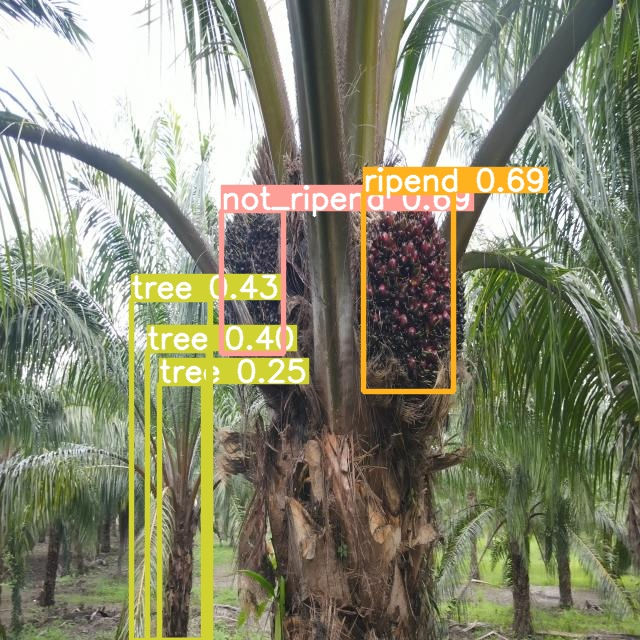

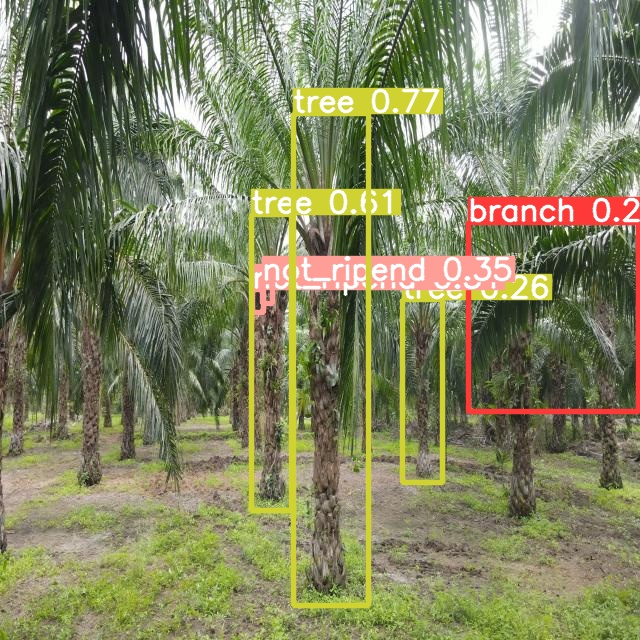

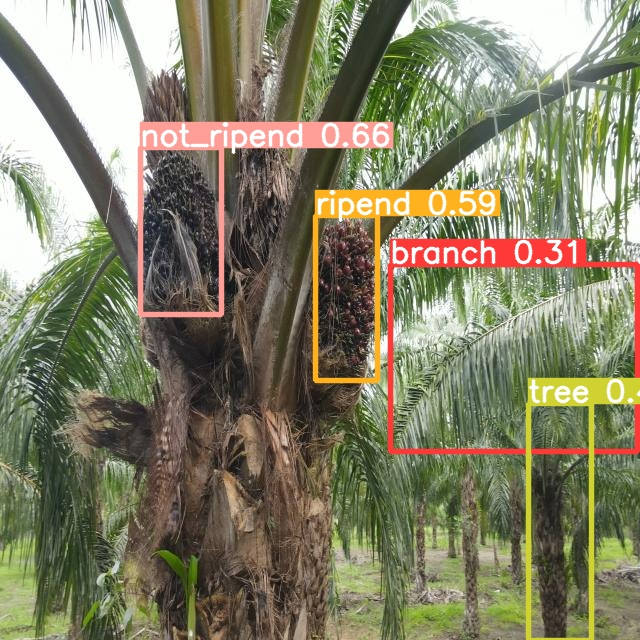

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/istock.mp4 save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/897) /content/istock.mp4: 480x800 25.1ms
video 1/1 (2/897) /content/istock.mp4: 480x800 20.9ms
video 1/1 (3/897) /content/istock.mp4: 480x800 19.5ms
video 1/1 (4/897) /content/istock.mp4: 480x800 1 ripend, 16.5ms
video 1/1 (5/897) /content/istock.mp4: 480x800 1 ripend, 16.4ms
video 1/1 (6/897) /content/istock.mp4: 480x800 1 ripend, 16.4ms
video 1/1 (7/897) /content/istock.mp4: 480x800 1 ripend, 16.4ms
video 1/1 (8/897) /content/istock.mp4: 480x800 1 ripend, 16.4ms
video 1/1 (9/897) /content/istock.mp4: 480x800 1 ripend, 16.4ms
video 1/1 (10/897) /content/istock.mp4: 480x800 1 ripend, 16.4ms
video 1/1 (11/897) /content/istock.mp4: 480x800 11.3ms
video 1/1 (12/897) /content/istock.mp4: 480x800 11.3ms
video 1/1 (13/897) /content/istock.mp4: 480x800 11.4ms
video 1/1 (14/897) /content/istock.mp4: 480x800

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.50 source=/content/21.mp4 save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/883) /content/21.mp4: 800x480 17.4ms
video 1/1 (2/883) /content/21.mp4: 800x480 16.4ms
video 1/1 (3/883) /content/21.mp4: 800x480 16.3ms
video 1/1 (4/883) /content/21.mp4: 800x480 16.1ms
video 1/1 (5/883) /content/21.mp4: 800x480 14.2ms
video 1/1 (6/883) /content/21.mp4: 800x480 14.2ms
video 1/1 (7/883) /content/21.mp4: 800x480 14.2ms
video 1/1 (8/883) /content/21.mp4: 800x480 14.2ms
video 1/1 (9/883) /content/21.mp4: 800x480 14.2ms
video 1/1 (10/883) /content/21.mp4: 800x480 14.2ms
video 1/1 (11/883) /content/21.mp4: 800x480 14.2ms
video 1/1 (12/883) /content/21.mp4: 800x480 14.2ms
video 1/1 (13/883) /content/21.mp4: 800x480 14.2ms
video 1/1 (14/883) /content/21.mp4: 800x480 10.9ms
video 1/1 (15/883) /content/21.mp4: 800x480 9.5ms
video 1/1 (16/883) /content/21.mp4: 800x480 9.5ms
video 1/1 (17/883)